# Chapter 6 Evaluating Classifiers

In [1]:
# setup
from mlwpy import *
%matplotlib inline

iris = datasets.load_iris()
tts = skms.train_test_split(iris.data, iris.target,
                            test_size=.33, random_state=21)

(iris_train_ftrs, iris_test_ftrs,
 iris_train_tgt, iris_test_tgt) = tts

# 6.1 Baseline Classifiers

`sklearn` calls *baseline methods* *dummy methods*, which are the simplest ideas we can come up with.

There are four levels of learning systems:

1. Baseline methods: Prediction based on simple stats or random guesses.
2. Simple off-the-shelf learning methods: Predictors that are less resource-intensive.
3. Complex off-the-shelf methods: Predictors that are generally more resource-intensive.
4. Customized, boutize learning methods.

In `sklearn`, there are four baseline classification methods.  We show code for five.  However, two are duplicates.  Each method makes a prediction when given a test example.  Two baseline methods are random, the flip coins.  Two return a constant value.  They always predict the same thing.  

The random methods are:

* `uniform`: choose evenly among the target classes based on the *number* of classes
* `stratified`: choose evenly among the target classes based on *frequency* of the classes

The two constant methods are:

* `constant`: return one target class that we've picked out
* `most_frequent`: return the single most likely class.   Also `most_frequent` is available under the name `prior`.

The two random methods behave differently when datsetse have rare occurrences, like a rare disease.  When there are two classes, the `uniform` method picks evenly, 50%-50%, between the two classes.  It picks more sick people than there are in realiity.

The `stratified` method, picks in a manner similar to stratified sample.  It picks healthy or sick as the target based on the percents of healthy and sick people in the data.  If there are 5% of sick people, it picks sick around 5% of the time and healthy 95% of the time.

The following is a simple use of a `most_frequent` baseline method.



In [105]:
# normal usage: build-fit-predict-evaluate
baseline = dummy.DummyClassifier(strategy='most_frequent')
baseline.fit(iris_train_ftrs, iris_train_tgt)
base_preds = baseline.predict(iris_test_ftrs)

base_acc = metrics.accuracy_score(base_preds, iris_test_tgt)
print(base_acc)

0.3


Let's compare the performance of the simple baseline strategies against each other:

In [106]:
strategies = ['constant', 'uniform', 'stratified', 'prior', 'most_frequent']

# set up args to create different DummyClassifier strategies
baseline_args = [{'strategy':s} for s in strategies]
baseline_args[0]['constant'] = 0 # class 0 is setosa


accuracies = []
for bla in baseline_args:
    baseline = dummy.DummyClassifier(**bla)
    baseline.fit(iris_train_ftrs, iris_train_tgt)
    base_preds = baseline.predict(iris_test_ftrs)
    accuracies.append(metrics.accuracy_score(base_preds, iris_test_tgt))
    
display(pd.DataFrame({'accuracy':accuracies}, index=strategies))

,accuracy
constant,0.3600
uniform,0.4000
stratified,0.3000
prior,0.3000
most_frequent,0.3000


In [107]:
baseline_args

[{'strategy': 'constant', 'constant': 0},
 {'strategy': 'uniform'},
 {'strategy': 'stratified'},
 {'strategy': 'prior'},
 {'strategy': 'most_frequent'}]

`uniform` and `stratified` will return different results when rerun multiple times on a fixed train-test split because they are *randomized* methods.  The other strategies always return the same values for a fixed train-test split. 

# Beyond Accuracy: Metrics for Classification

We discussed a grand total of two metrics so far: accuracy for classification and rout-mean-squared-error (RMSE) for regression. `sklearn` has a plethora of alternatives:

In [108]:
import textwrap
print(textwrap.fill(str(sorted(metrics.SCORERS.keys())),
                  width=70))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score',
'average_precision', 'balanced_accuracy', 'completeness_score',
'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples',
'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score',
'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples',
'jaccard_weighted', 'max_error', 'mutual_info_score',
'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error',
'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance',
'neg_mean_poisson_deviance', 'neg_mean_squared_error',
'neg_mean_squared_log_error', 'neg_median_absolute_error',
'neg_root_mean_squared_error', 'normalized_mutual_info_score',
'precision', 'precision_macro', 'precision_micro',
'precision_samples', 'precision_weighted', 'r2', 'rand_score',
'recall', 'recall_macro', 'recall_micro', 'recall_samples',
'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted',
'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy',
'v_measure_score']


Not all are designed for classifiers and we're not going to discuss them all.  How can we identify the scorer used for a particular classifier, say *k*-NN.  You can see the whole output with `help(knn.score)`.  However, we can trim it down to the good bits.

In [109]:
knn = neighbors.KNeighborsClassifier()

help(knn.score) # verbose, but complete

print(knn.score.__doc__.splitlines()[0])
print('\n---and---\n')
print('\n'.join(knn.score.__doc__.splitlines()[-6:]))

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.neighbors._classification.KNeighborsClassifier instance
    Return the mean accuracy on the given test data and labels.
    
    In multi-label classification, this is the subset accuracy
    which is a harsh metric since you require for each sample that
    each label set be correctly predicted.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples.
    
    y : array-like of shape (n_samples,) or (n_samples, n_outputs)
        True labels for `X`.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    
    Returns
    -------
    score : float
        Mean accuracy of ``self.predict(X)`` wrt. `y`.



---and---


        Returns
        -------
        score : float
            Mean accuracy of ``self.predict(X)`` wrt. `y`.
        


The classifier returns the mean accuracy on the given test data and labels.

Accuracy has some fundamental limits and we are going to disccus `precision`, `recall`, `roc_auc`, and `f1`.

## 6.2.1 Eliminating Confusion from the Confusion Matrix

## 6.2.2 Ways of Being Wrong

| | ***I think:*** **pot is hot** | ***I think***:  **post is cold** | 
| --- | --- | --- |
| **pot** ***is*** **hot** |  I thought hot <br/> it is hot <br/> I'm right | I thought cold <br/> it is not cold <br/> I'm wrong | 
| **pot** ***is*** **cold** | I thought hot <br/> it is not hot <br/> I'm wrong | I thought cold <br/> it is cold <br/> I'm right | 

| | ***I think:*** **pot is hot (Positive)** | ***I think***:  **post is cold (Negative)** | 
| --- | --- | --- |
| **pot** ***is*** **hot** |  True (predicted) Positive | False (predicted) Negative | 
| **pot** ***is*** **cold** | False (predicted) Positive | True (predicted) Negative | 

| | **Predicted Positive (PredP)** | **Predicted Negative (PredN)** |
| --- | --- | --- | 
| **Real Positive (RealP)** | True Positive (TP) | False Negative (FN) |
| **Real Negative (RealN)** | False Positive (FP) | True Negative (TN) | 

## 6.2.3 Metrics from the Confusion Matrix

If we are doctors, we care how well we're able to find people who are, in reality, sick.  Since we defined sick as our positive case, these are the people in the first row.  We are now asking how well we do on Real Positive records: how many, within the actual real-world sick people, do we correctly detect: $\frac{TP}{TP + FN} = \frac{TP}{Real Positive}$.  The term for this is *sensitivity*.  It is also called *recall*.  You can think of it as "how dialed-in is this test to finding sick people."  

As a way to think of recall, consider getting hits from a web seearch.  Of the really valuable or interesting his, Real Positive, how many did we find, or recall, correctly.  For sensitivity/recall, we care about correctness in the real-world positive cases.  It is also called the *true positive rate* (TPR).

As a complement to caring about the sick or interesting cases we got right, we can consider the sick folks we got *wrong*.  This error is called a *false negative*.  The sick people we got wrong is $\frac{FN}{TP + FN}$.  Adding up all the sick people we got right and the sick people we got wrong gives us *all* of the sick people total.  $\frac{TP}{TP + FN} + \frac{FN}{TP + FN} = \frac{TP + FN}{TP + FN} = 1 = 100\% $ 

Also we can ask, "How well do we do on healthy people?"  Then, our focus is on the second row, on the RealN.  Again, if we are doctors, we want to know what the value of our test is when people are healthy.  While the risk is different, there is still risk in misdiagnosing healthy people.  We don't want to tell people they are sick when they are healthy.  The mistake is a case of a *false positive* (FP).  We evaluate it by looking at how correct we are on healthy people: $\frac{TN}{FP + TN} = \frac{TN}{Real Negative}$.  The diagnostic term for this is *specificity* of the test: does the test only raise a flag in the specific cases we want it to.  Specificity is also known as the *true negative rate* (TNR).  It is the true negative rate with respect to reality.

One last combination of confusion matrix cells takes the *prediction* as the primary part and reality as the secondary part.  You can think of it as answering "What is the value of our test when it comes back *positive*?"  Or, more briefly, "What's the value of a hit?" Hits are Predicted Positive.  Inside Predicted Positive, we count the number correct: TP.  Then we have $\frac{TP}{Predicted Positive} = \frac{TP}{TP + FP}$, which is called *precision*.  

![](confusion.jpg)

When reading it, you may notice that some authors swap the axes.  In such instances, the reality column is on the top and the predictions in the rows.  Then TP and TN will be the same, but FP and FN will be flipped.

## 6.2.4 Coding the Confusion Matrix

We use the chaining method in the following code.  

In [110]:
tgt_preds = (neighbors.KNeighborsClassifier()
                      .fit(iris_train_ftrs, iris_train_tgt)
                      .predict(iris_test_ftrs))

print('accuracy:', metrics.accuracy_score(iris_test_tgt,
                                          tgt_preds))

cm = metrics.confusion_matrix(iris_test_tgt,
                              tgt_preds)

print('confusion matrix:', cm, sep='\n')

accuracy: 0.94
confusion matrix:
[[18  0  0]
 [ 0 16  1]
 [ 0  2 13]]


We can use the followingcode to make the confusion matrix a *pretty* table.

Text(14.999999999999996, 0.5, 'Actual')

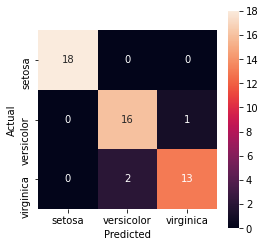

In [111]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
cm = metrics.confusion_matrix(iris_test_tgt, tgt_preds)
ax = sns.heatmap(cm, annot=True, square=True,
                 xticklabels=iris.target_names,
                 yticklabels=iris.target_names)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

In some respects *setosa* is easy.  We get it 100% right.  We have some mixed signals on *versicolor* and *virginica*, but we do not do too badly there either.  The errors with *versicolor* and *verginica* are confined to misclassifying between the two classes.  We don't get any cross-classificaiton back into *setosa*.  We can think of *setosa* as being a clean category of its own.  The two *v* species have some overlap that is harder to sort out.

# 6.2.5 Dealing with Multiple Classes: Multiclass Averaging

How do we *compress* the rich information in a many-values confusion matrix into simpler values?

In our classification, we made three mistakes.  We predicted one *versicolor* as *verginica* and we predicted two *virginica* as *versicolor*.  Let's think in terms of *value of a prediction* for a moment. In two-class metrics, it was the job of precision to draw out information from the positive prediction column.  When we predict *versicolor*, we are correct 16 times and wrong 2.  If we consider *versicolor* on one side and everyone else on the other side, we can calculate something very much like precision.  This gives us $\frac{16}{18} \approx .89$ for a one-versus-rest precision for *versicolor*.  Similarly, we get $\frac{13}{14} \approx .93$ for a one-versus-rest precision for *virginica*. 

How do we combine these breakdowns into a *single* value? We talked about a few options for summarizing data, let's use the *mean*.  Because we are perfect when we predict *setosa,* that contributes 1.0.  So the mean of $\{\frac{16}{18},\frac{13}{14},1\}$ is about .9392.  This method of summarizing the predictions is called `macro` by `sklearn`.  We calculate the *marco precision* by computing a value for each column and then dividing by the number of columns.  To compute the value for one column, we take the diagonal entry in the column--where we are correct--and divide by the sum of all values in the column.

In [112]:
macro_prec = metrics.precision_score(iris_test_tgt,
                                     tgt_preds,
                                     average='macro')

print('macro:', macro_prec)

cm = metrics.confusion_matrix(iris_test_tgt, tgt_preds)
n_labels = len(iris.target_names)
print('should equal \'macro avg\':',
       # correct           column          # column
      (np.diag(cm) / cm.sum(axis=0)).sum() / n_labels )


macro: 0.9391534391534391
should equal 'macro avg': 0.9391534391534391


Now that we discussed the `macro` average, we can discuss the `micro` average.  The name `micro` is a bit counterintuitive.  Even the `sklearn` docs say that `micro` 'calculates metrics globally'! The `micro` is a broader look at the results. `micro` takes all the *correct* predictions and divides by *all* the predictions we made.  These come from (1) the sum of the values on the diagonal of the confusion matrix and (2) the sum of all values in the confusion matrix:

In [113]:
print('micro:', metrics.precision_score(iris_test_tgt,
                                        tgt_preds,
                                        average='micro'))

cm = metrics.confusion_matrix(iris_test_tgt, tgt_preds)
print('should equal avg=\'micro\':',
    # TP.sum()        / (TP&FP).sum() -->
    # all correct     / all preds
    np.diag(cm).sum() / cm.sum())  

micro: 0.94
should equal avg='micro': 0.94


`classification_report` wraps several of the pieces together.  It computes the one-versus-all statistics and then computes a *weighted* average of the values--like `macro` except with different weights.  The weights come from the *support*.  The support of a classification rule--*if x is a cat and x is striped and x is big, then x is a tiger*--is the count of the examples where the rule applies.  Therefore, if 45 out of 100 examples meet the constraints on the left-hand side of the *if*, then the support is 45.  In `classification_report`, it is the 'support in reality' of our examples.  Therefore, it's equivalent to the total counts in each *row* of the confusion matrix.

In [114]:
print(metrics.classification_report(iris_test_tgt,
                                    tgt_preds))

# average is a weighted macro average (see text)

# verify sums-across-rows
cm = metrics.confusion_matrix(iris_test_tgt, tgt_preds)
print('row counts equal support:', cm.sum(axis=1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.89      0.94      0.91        17
           2       0.93      0.87      0.90        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50

row counts equal support: [18 17 15]


We see and confirm several values that we calculated by hand.

## 6.2.6 $F_1$

$F_1$ computes a different kind of average from the confusion matrix entries.  By average, we mean a measure of center.  We already know about *the* mean (arithmetic average or arithmetic mean) and median (the middle-most of sorted values).  There are other types of averages out there.  The ancient Greeks actually cared about three averages or means: the arithmetic mean, the geometric mean, and the harmonic mean.  

A helpful view of these special means is that they are wrappers around a converted arithmetic mean.  The geometric mean is computed by taking the arithmetic mean of the logarithms of the values and then exponentiating the value.  Here, we are concerned with the harmonic mean.  The equivalent computation is to do the following:

1. Take the arithmetic mean of the reciprocals 
2. Take the reciprocal of that

The harmonic mean is very useful when we need to summarize rates like speed or compare different fractions.

$F_1$ is a harmonic mean with a slight tweak.  It has a constant in front, but don't let taht fool you.  We're just doing a harmonic mean.  It plays out as $$ F_1 = 2 \times \frac{1}{\frac{1}{precision}+\frac{1}{recall}} $$

If we apply some algebra by taking common denominators and doing an invert-and-multiply, we get the usual textbook formula for $F_1$:  $$ F_1 = 2 \frac{precision \times recall}{precision + recall} $$

The formula represents an *equal* tradeoff between preciion and recall.  In English, this means we want to be equally right in the value of our predictions and with respect to the real world.  We can make other tradeoffs: see the End-of-Chapter Notes on $F_{\beta}$.

## 6.3 ROC Curves

We haven't talked about it explicitly, but our classification methods can do more than just slap a label on an example.  They can also give a probability to each predction.  Imagine after training, a classifier comes up with scores for ten individuals who might have a disease.  The scores are .05, .15, ..., .95.  Based on training, it is determined that .7 is the best break point between folks that have the disease (higher scores) and folks that are healthy (lower scores).  This is illustrated in the figure below.

![](thresh-1.jpg)

Figure 2. A medium-high threshold produces a low number of claimed hits (diseases).

What happens if we move the bar to the left, as in the figure below.  Then, we are claiming more people are sick.

![](thresh-2.jpg)

Figure 3. A lower threshold-an easier bar to clear-leads to more claimed hits (diseases).

We haven't said anything about whether these people are *really* sick or healthy.  Let's augment that scenario by adding some truth.  The table entries are the scores of individuals from the classifier.

| | **Pred Posivite** | **Pred Negative** |
| --- | --- | --- |
| **Real Positive** | .05 .15 .25 | .55 .65 |
| **Real Negative** | .35 .45 | .75 .85 .95 |

Think of the confusion matris, and image moving the bar between predicted positives and predicted negatives to the left or right.  The PredictionBar separates PredP from PredN: PredP are to the left and PredN are to the right.  If we move the PredictionBar far enough to the right, we push examples that fell on the right of the bar to the left of the bar.  This changes predicted negatives to predicted positives.  If we slam the PredictionBar all the way to the right, we are saying that we predict everything as a PredP.  Therefore, there would be no PredN.  Then, we have absolutely no false negatives.
However, by predicting everything as real positives, we do great on real positives and horrible on real negatives.

There is a tradeoff taking place. Here, the tradeoff is between how many false positives we will tolerate versus how many false negatives we will tolerate.  We control this tradeoff by moving our prediction bar, by setting a threshold.  We can be hyper-risk-averse and label everyone sick so we don't miss catching a sick person. Or, we can be penny-pinchers and label everyone healthy, so we don't have to treat anyone.  Either way, there are two questions:

1. How do we evaluate and select our threshold? How do we pick a specific tradeoffs between false positives and false negatives?
2. How do we compare two different classification systems, both of which have a whole range of possible tradeoffs?

Fortunately, there is a nice graphical tool that lets us answer these questions: the *ROC curve*.  The *ROC curve,* also known as the *Receiver Operating Characteristic curve,* has a long history in classification.    Originally, it was used to quantify radar tracking of bombers headed towards England during World War II.  They needed to determine whether a blip on the radar screen was a real threat (a bomber) or not (a ghosted echo of a plane or a bird): to tell true positives from false positives.

ROC curves are normally drawn in terms of *sensitivity* (also called *true positive rate*, TPR).  1 - *specificity* is called the *false positive rate* (FPR).  These both measure performance *with respect to the breakdown in the real world.*.  We want to have a *high* TPR: 1.0 is perfect.  Also, we want a *low* FPR: 0.0 is great.  We've seen that we can guarantee a high TPR by making the prediction bar so low that we say *everyone* is positive.  But what does that do to our FPR? Exactly! It sends it up to one: fail.  The opposite case--cheating towards saying no one is sick--gets us a great FPR of zero.  There are no false claims of sickness, but our TPR is no good.  It's also zero, while we wanted that value to be near 1.0.

## 6.3.1 Patterns in the ROC

The bottom-left corner of the graph represents a FPR of zero and a TPR of zero.  The top-right corner represents TPR and FPR both equal to one.  Neither case is ideal.  The top-left corner represents an FPR of 0 and a TPR of 1--perfection.

In `sklearn`, a low threshold means moving the PredictionBar all the way to the right of the confusion matrix: we make everything positive.  This occurs in the top-right corner of the ROC graph.  This occurs in the top-right corner of the ROC graph.  A high threshold means we make many things negative--our PredictionBar is slammed all the way left in the confusion matrix.  It's hard to get over a high bar to be a positive.  This is what happens in the bottom-left corner of the ROC graph.  We have no false positives because we have no positives at all! As the threshold decreases, it gets easier to say something is positive.  We move across the graph from bottom-left to top-right.

![](roc.jpg)

Four things stand out in the ROC graph.

1. The $y = x$ line from the bottom-left corner to the top-right corner represents coin flipping: randomly guessing the target class.  Any decent classifier should do better than this.  Better means pushing towards the top-left of the diagram.
2. A perfect classifier lines up with the left side and the top of the box.
3. Classifier A does *strictly* better than B and C. A is more to the top-left than B and C, everywhere.
4. B and C flip-flop.  At the higher thresholds B is better; at lolwer thresholds C is better.

The second point about a perfect classifier is a bit confusing.  Remember a threshold of zero is nice because everything is positive.  Of the real positives, we get all of them correct even thoughwe get all the real negatives wrongs.  A threshold of one has some benefit because everything is predicted negative.  Of the real negatives, we get them all, even though we get all the real positives wrong.  Those errors are due to the extreme thresholds--not our classifier.  Any classifier would suffer under the thumb of these authoritarian thresholds.  They are just 'fixed points' on *ever* ROC graph.

Let's walk across the ROC curve for our *perfect* classifier.  If our threshold is at one, even if we give something a correct score, it is going to get thrown in as negative, regardless of the score.  We are stuck at the bottom-left corner of the ROC curve.  If we slide our threshold down a bit, some examples can become positives.  However, since we're perfect, none of them are *false* positives.  Our TPR is going to creep up, while our FPR stays 0: we are climbing the left side of the ROC box. Eventually, we'll be at the ideal threshold that balances our FPR of zero and achieves a TPR of 1.  This balance point is the *correct* threshold for our perfect classifier.  If we move beyond this threshold, again, the threshold itself becomes the problem (not the classifier).  Now, the TPR will stay constant at 1, but the FPR will increase--we're moving along the top of the ROC box now--because our threshold is forcing us to claim more things as positive regardless of their reality.

### 6.3.2 Binary ROC

OK, with a conceptual discussion out of the way, how do we make ROC work? There's a nice single call, `metrics.roc_curve` to do the heavy lifting after we do a couple of setup steps.  But we need to do a couple of setup steps.  First, we convert the iris problem into a *binary* classification task to simplify the interpretation of the results.  We'll do that by converting the target class from the standard three-species problem to a binary yes/no question.  The three species question asks, "Is it *virginica, setosa,* or *versicolor*?" The answer is one of the three species.  The binary question asks, "Is it *versicolor*?"  The answer is yes or no.

Second, we need to invoke the classification scoring mechanism of our classifier so we can tell who is on which side of our prediction bar.  Instead of outputting a class like *versicolor*, we need to know some score or probability, such as a .7 likelihood of *versicolor*.  We do that by using `predict_proba` instead of our typical `predict`.  `predict_proba` comes back with probabilities for *False* and *True* in two columns.  We need the probability from the *True* column. 

In [115]:
# warning: this is 1 "one" not l "ell"
is_versicolor = iris.target == 1

tts_1c = skms.train_test_split(iris.data, is_versicolor,
                               test_size=.33, random_state = 21)

(iris_1c_train_ftrs, iris_1c_test_ftrs,
 iris_1c_train_tgt, iris_1c_test_tgt) = tts_1c

# build, fit, predict (probability scores) for NB model
gnb = naive_bayes.GaussianNB()
prob_true = (gnb.fit(iris_1c_train_ftrs, iris_1c_train_tgt)
                .predict_proba(iris_1c_test_ftrs)[:, 1]) # [:, 1]=='True'

In [116]:
gnb.predict_proba(iris_1c_test_ftrs)[:, 1]

array([0.9799, 0.    , 0.    , 0.    , 0.9527, 0.9277, 0.    , 0.0091,
       0.    , 0.    , 0.8564, 0.9588, 0.    , 0.    , 0.    , 0.2639,
       0.2358, 0.961 , 0.    , 0.05  , 0.319 , 0.8894, 0.7879, 0.9656,
       0.    , 0.3937, 0.    , 0.    , 0.9795, 0.    , 0.    , 0.    ,
       0.1061, 0.    , 0.348 , 0.9374, 0.3949, 0.    , 0.    , 0.05  ,
       0.116 , 0.    , 0.0102, 0.9713, 0.    , 0.    , 0.    , 0.    ,
       0.9582, 0.    ])

With the setup done, we can do the calculations for the ROC curve and display it.  Don't get distracted by the `auc`.  We'll come back to that in a minute.

FPR : [0.     0.     0.     0.0606 0.0606 0.1212 0.1212 0.1818 1.    ]
TPR : [0.     0.0588 0.8824 0.8824 0.9412 0.9412 1.     1.     1.    ]


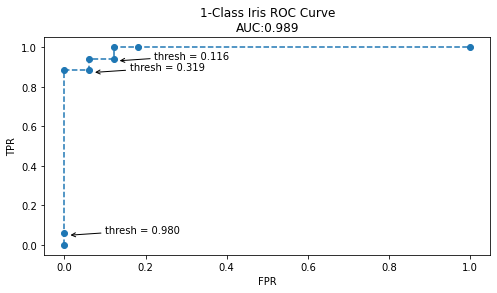

In [117]:
fpr, tpr, thresh = metrics.roc_curve(iris_1c_test_tgt,
                                     prob_true)
auc = metrics.auc(fpr, tpr)
print('FPR : {}'.format(fpr),
      'TPR : {}'.format(tpr), sep='\n')

# create the main graph
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(fpr, tpr, 'o--')
ax.set_title('1-Class Iris ROC Curve\nAUC:{:.3f}'.format(auc))
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')

# do a bit of work to label some points with their
# respective thresholds
investigate = np.array([1, 3, 5])
for idx in investigate:
    th, f, t = thresh[idx], fpr[idx], tpr[idx]
    ax.annotate('thresh = {:.3f}'.format(th),
                xy=(f+.01, t-.01), xytext=(f+.1, t),
                arrowprops = {'arrowstyle':'->'})

Most of the FPR values are between 0.0 and 0.2, while the TPR values quickly jump into the range of 0.9 to 1.0.  Let's dive into the calculation of these values.  Remember, each point represents a different confusion matrix based on its own unique threshold.  Here are the confusion matrices for the second, fourth, and sixth thresholds which are also labeled in the prior graph.  Thanks to zero-based indexing, these occur at indices 1, 3, and 5 which I assigned to the variable `investigate` in the previous cell.  We could have picked any of the eight thresholds that `sklearn` found.  Verbally, we can call these a high, middle, and low bar for being sick--or in this case, for our positive class of *is_versicolor* (predicted true). 

| Bar | Medical Claim | Prediction |
| --- | --- | --- |
| Low | Easy to call sick | Easy to predict True |
| Mid | |
| High | Hard to call sick | Hard to predict False |

Let's look at these values.

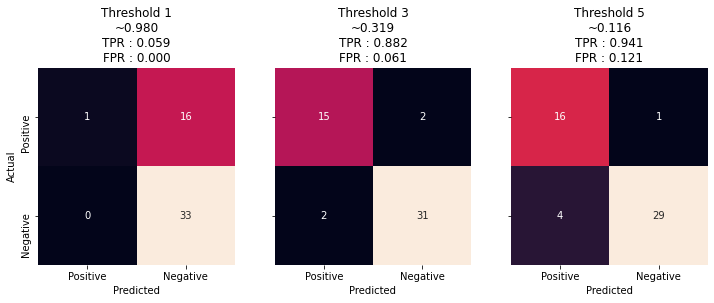

In [118]:
title_fmt = 'Threshold {}\n~{:5.3f}\nTPR : {:.3f}\nFPR : {:.3f}'

pn = ['Positive', 'Negative']
add_args = {'xticklabels': pn,
            'yticklabels': pn,
            'square':True}

fig, axes = plt.subplots(1, 3, sharey = True, figsize=(12, 4))
for ax, thresh_idx in zip(axes.flat, investigate):
    preds_at_th = prob_true < thresh[thresh_idx]
    cm = metrics.confusion_matrix(1-iris_1c_test_tgt, preds_at_th)
    sns.heatmap(cm, annot=True, cbar=False, ax=ax, **add_args)
    
    ax.set_xlabel('Predicted')
    ax.set_title(title_fmt.format(thresh_idx,
                                  thresh[thresh_idx],
                                  tpr[thresh_idx],
                                  fpr[thresh_idx]))
    
axes[0].set_ylabel('Actual');
# note: e.g. for threshold 3
# FPR = 1-spec = 1 - 31/(31+2) = 1 - 31/33 = 0.0606...


Getting the values lined up takes a bit of trickery.  When `prob_true` is below the threshold, we are predicting a *not-versicolor*.  So, we have to negate our target class using `1-iris_1c_test_tgt` to get the proper alignment.  Also, we hand-label the axes so we don't have `0` as the positive class.  Notice that as we lower our threshold--move PredictionBar to the right--there is a flow of predictions from the right of the confusion matrix to the left.  We predict more things as positive as we lower the threshold.  You can think of examples as spilling over the prediction bar.  The happens in the order given to the examples by the `probas`.

### 6.3.3 AUC: Area-Under-the-(ROC)-Curve

You'll notice that we calculated `metrics.auc` above and printed out its values in the graph titles.  "How can we summarize an ROC curve as a single value?" We answer by calculating the *area under the curve* (AUC) taht we've just drawn.

Recall that the perfect ROC curve is mostly just a point in the top-left.  Including the extreme thresholds, we get the bottom-left and top-right poitns.  The points trace the left and upper perimeter of the box.  The area under the lines connecting the points is 1.0, because they surround a square with side lengths equal to 1.  If our classifier gets as bad as random coin flipping, the line from bottom-left to top-right will cover half of the square.  So, our reasonable range of values for AUC goes from 0.5 to 1.0.  I said reasonable because we *could* see a classifier that is reliably worse than coin flipping.  Think about what a constant prediction of a low-occurrence target class--always predicting sick in the case of a rare disease--would do.

The AUC is an *overall* measure of classifier performance at a series of thresholds.  It summarizes a lot of information and subtlety into one number.  As such, it should be approached with caution.  We saw in the abstract ROC diagram that the behavior and rank order of classifiers may change at different thresholds.  On the other hand, the benefit of single-value summaries is that we can very easily compute other statistics on them and summarize them graphically.  For example, here are several cross-validated AUCs displayed simultaneously on a strip plot.

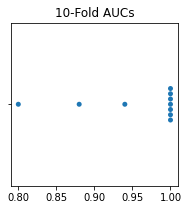

In [119]:
fig,ax = plt.subplots(1, 1, figsize=(3, 3))
model = neighbors.KNeighborsClassifier(3)
cv_auc = skms.cross_val_score(model, iris.data, iris.target==1,
                              scoring='roc_auc', cv=10)
ax = sns.swarmplot(cv_auc, orient='v')
ax.set_title('10-Fold AUCs');


## 6.3.4. Multiclass LEarners, One-versus-Rest, and ROC

`metrics.roc_curve` is ill-equipped to deal with multiclass problems: it yells at us if we try.  We can work around it by recoding our tri-class problem into a series of me-versus-the-world or one-versus-rest (OvR) alternatives.  OvR means we want to compare each of the following binary problems: 0 versus [1, 2], 1 versus [0, 2], and 2 versus [0, 1]. Verbally, it is one target class versus all the others.  Our basic tool to encode these comparisons into our data is `label_binarize`. Let's look at examples 0, 50, and 100 from the original multiclass data.

In [120]:
checkout = [0, 50, 100]
print('Original Encoding')
print(iris.target[checkout])

Original Encoding
[0 1 2]


So, examples 0, 50, and 100 correspond to classes 0, 1, and 2.  When we binarize, the classes become:

In [121]:
print("'Multi-label' Encoding")
print(skpre.label_binarize(iris.target, [0, 1, 2])[checkout])

'Multi-label' Encoding
[[1 0 0]
 [0 1 0]
 [0 0 1]]


You can interpret the new encoding as columns of Boolean flags--yes/no or true/false--for "Is it class *x*?" The first column answers, "Is it class 0?" For the first row (example `0`), the answsers are yes, no, and no.  It is a complicated way to break down the statement "I am class 0" into three questions. "Am I class 0?" *yes*. "Am I class 1?" *No.* "Am I class 2?" *No*.  Now we add a layer of complexity to our classifier.  Instead of a *single* classifier, we are going to make one classifier for each target class--that is, one for each of the three new target columns.  These become:

1. a classifier for class 0 versus rest
2. a classifier for class 1 versus rest
3. a classifier for class 2 versus rest.  

Then, we look at the individual performance of the three classifiers.

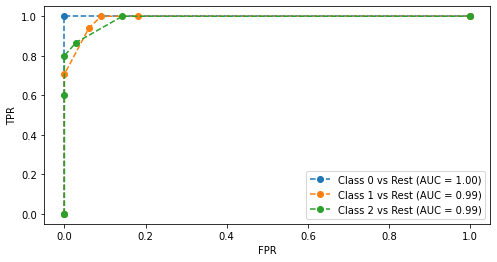

In [122]:
iris_multi_tgt = skpre.label_binarize(iris.target, [0,1,2])

# im --> "iris multi"

(im_train_ftrs, im_test_ftrs,
 im_train_tgt, im_test_tgt) = skms.train_test_split(iris.data,
                                                    iris_multi_tgt,
                                                    test_size=.33,
                                                    random_state=21)

# knn wrapped up in one-versus-rest (3 classifiers)
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
ovr_knn = skmulti.OneVsRestClassifier(knn)
pred_probs = (ovr_knn.fit(im_train_ftrs, im_train_tgt)
                     .predict_proba(im_test_ftrs))

# make ROC plots
lbl_fmt = "Class {} vs Rest (AUC = {:.2f})"
fig,ax = plt.subplots(figsize=(8, 4))
for cls in [0, 1, 2]:
    fpr, tpr, _ = metrics.roc_curve(im_test_tgt[:,cls],
                                    pred_probs[:,cls])
    label = lbl_fmt.format(cls, metrics.auc(fpr,tpr))
    ax.plot(fpr, tpr, 'o--', label=label)
ax.legend()
ax.set_xlabel('FPR')
ax.set_ylabel('TPR');

All three classifiers are pretty respectable: they have few defects compared to a perfect classifier that follows the graph borders.  We saw earlier that *Class 0* (*setosa*) was fairly easy to separate, so we aren't too surprised at it doing well here.  Each of the other classifiers get very good TPR rates at pretty minimal FPR rates (below .18 or so).  Incidentally, the analysis is the exact strategy we can use to pick a threshold.  We can identify an acceptable TPR and then choose the threshold that gets us the best FPR for that TPR.  We can also work the other way around if we care more about FPR than TPR.  For example, we may only want to identify people that are suitably likely to be sick to prevent unnecessary, invasive, and costly medical procedures.

# 6.4 Another Take on Multiclass: One-versus-One

There's another approach to dealing with the sometimes negative interaction between multiclass problems and learning systems.  In one-versus-rest, we chunk off apples against all other fruit in one grand binary problem.  For apples, we create *one* one-versus-rest classifier.

An alternative is to chuck off appe-versus-banan, apple-versus-orange, apple-versus-pineapple, and so forth.  Instead of one grand Boolean comparison for apples, we make *n* - 1 of them where *n* is the number of classes we have.  This alternative is called *one-versus-one*.  How do we wrap the one-versus-one winners into a grand winner for making a single prediction?  A simple answer is to take the sums of the individual wins as we would in a round-robin competition.  `sklearn` does some normalization on this, so it is a little hard to see--but the punch line is that the class with the biggest number of wins is the class we predict.

The one-versus-one wrapper gives us *classification scores* for each individual class.  These values are *not* probabilities.  We can take the index of the maximum classification score to find the single best-predicted class.

In [123]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
ovo_knn = skmulti.OneVsOneClassifier(knn)
pred_scores = (ovo_knn.fit(iris_train_ftrs, iris_train_tgt)
                      .decision_function(iris_test_ftrs))
df = pd.DataFrame(pred_scores)
df['class'] = df.values.argmax(axis=1)
display(df.head())

,0,1,2,class
0,-0.2222,2.1667,1.1667,1
1,2.0000,1.0000,0.0000,0
2,2.0000,1.0000,0.0000,0
3,2.0000,1.0000,0.0000,0
4,-0.2222,2.1667,1.1667,1


To see how the predictions line up with the votes, we can put the *actual* classes beside the one-versus-one classification scores:

In [124]:
# note: ugly to make column headers
mi = pd.MultiIndex([['Class Indicator', 'Vote'], [0, 1, 2]],
                    [[0]*3+[1]*3,list(range(3)) * 2])
df = pd.DataFrame(np.c_[im_test_tgt, pred_scores],
                  columns=mi)
display(df.head())

Class Indicator                                            \
                     0                    1                    2   
0               0.0000               1.0000               0.0000   
1               1.0000               0.0000               0.0000   
2               1.0000               0.0000               0.0000   
3               1.0000               0.0000               0.0000   
4               0.0000               1.0000               0.0000   

                  Vote                                            
                     0                    1                    2  
0              -0.2222               2.1667               1.1667  
1               2.0000               1.0000               0.0000  
2               2.0000               1.0000               0.0000  
3               2.0000               1.0000               0.0000  
4              -0.2222               2.1667               1.1667

You might be wondering why there were three classifiers for both one-versus-rest and one-versus-one.  If we have *n* classes, for one-versus-rest we will have *n* classifiers--one for each class against everyone else; that's why there are 3 there.  For one-versus-one, we have a classifier for each pair of classes.  The formula for the number of pairs of *n* things is $\frac{n(n-1}{2}$.  For three classes, this is  $\frac{3 \times 2}{2} = 3$.  You can think of the formula like this: pick a person (*n*), pick all their possible dance partners (*n* - 1, no dancing with yourself), and then remove duplicates (divide by two) because Crhis dancing with Sam is the same as Sam with Chris. 

## 6.4.1 Multiclass AUC Part Two: The Quest for a Single Value

We can make use of the one-versus-one idea in a slightly different way.  Instead of differnt *classifiers* competing in one-versus-one, we'll have a *single classifier* apply itself to the whole dataset.  Then, we'll pick out pairs of targets and see how the single classifier *does on each possible pairing*.  So, we compute a series of mini-confusion matrices for pairs of classes with a class *i* serving as *Positive* and another class *j* serving as *Negative*.  Then, we calculate an AUC from that.  We'll do that both ways--each of the pair serving as positive and negative--and take the average of all of those AUCs.  Basically, AUC is used to quantify the chances of a true cat being less likely to be called a dog than a random dog.  We're calling this method the Hand and Till *M*.

The following is the pseudocode:

1. Train a model.
2. Get classification scores for each example.
3. Create a blank table for each pairing of classes.
4. For each pair of classes $c_1$ and $c_2$:
    1. Find AUC of $c_1$ against $c_2$.
    2. Find AUC of $c_2$ against $c_1$.
    3. Entry for $c_1, c_2$ is the average of these AUCs.
    
5.  Overall value is the average of the entries in the table.

The trickiest bit of code is selecting just the examples where the two classes of interest interact.  For one iteration of the control loop, we need to generate an ROC curve for those two classes. So we need the examples where either of them occurs.  We track these down by doing a `label_binarize` to get indicator values, 1s and 0s, and then we pull out the particular columns we need from there.

In [125]:

def hand_and_till_M_statistic(test_tgt, test_probs, weighted=False):
    def auc_helper(truth, probs):
        fpr, tpr, _ = metrics.roc_curve(truth, probs)
        return metrics.auc(fpr, tpr)

    classes   = np.unique(test_tgt)
    n_classes = len(classes)
    
    indicator = skpre.label_binarize(test_tgt, classes)
    avg_auc_sum = 0.0
    
    # comparing class i and class j
    for ij in it.combinations(classes, 2):
        # use sum to act like a logical OR
        ij_indicator = indicator[:,ij].sum(axis=1,
                                           dtype=np.bool)
        
        # slightly ugly, can't broadcast these as indexes
        # use .ix_ to save the day
        
        ij_probs = test_probs[np.ix_(ij_indicator, ij)]
        ij_test_tgt = test_tgt[ij_indicator]
        
        i,j = ij
        auc_ij = auc_helper(ij_test_tgt==i, ij_probs[:, 0])
        auc_ji = auc_helper(ij_test_tgt==j, ij_probs[:, 1])
        
        # compare to Hand and Till referenece
        # no / 2 ... factor is out since it will cancel
        avg_auc_ij = (auc_ij + auc_ji)
        
        if weighted:
            avg_auc_ij *= ij_indicator.sum() / len(test_tgt)
        avg_auc_sum += avg_auc_ij
        
    # compared to Hand and Till reference
    # no * 2 ... factored out above and they cancel
    M = avg_auc_sum / (n_classes * (n_classes-1))
    return M

To *use* the Hand and Till method we've defined, we need to pull out the scoring/ordering/`proba`ing trick.  We send the *actual* targets and our scoring of the classes into `hand_and_till_M_statistic` and we get back a value.

In [126]:
knn = neighbors.KNeighborsClassifier()
knn.fit(iris_train_ftrs, iris_train_tgt)
test_probs = knn.predict_proba(iris_test_ftrs)
hand_and_till_M_statistic(iris_test_tgt, test_probs)

0.9915032679738562

There's a great benefit to writing `hand_and_till_M_statistic` the way we did.  We can use a helper routine from `sklearn` to turn our Hand and Till code into a *scoring function* that plays nicely with `sklearn` cross-validation routines.  Then, doing things like a 10-fold CV with our new evaluation metric is just a stroll in the park:

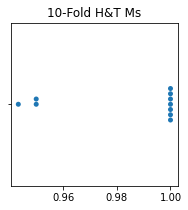

In [127]:
fig,ax = plt.subplots(1, 1, figsize=(3, 3))
htm_scorer = metrics.make_scorer(hand_and_till_M_statistic,
                                 needs_proba=True)
cv_auc = skms.cross_val_score(model,
                              iris.data, iris.target,
                              scoring=htm_scorer, cv=10)

sns.swarmplot(cv_auc, orient='v')
ax.set_title('10-Fold H&T Ms');


We also use `make_scorer` when we want to pass a `scoring` argument that isn't using `sklearn`'s predefined default values.  We see examples of that shortly.
Since Hand and Till *M* method uses one, and only one, classifier for evaluation, we have a direct connection between the performance of the classifier and the classifier itself.  When we use a one-versus-rest wrapper around a classifier, we lose the direct connection; instead we see how classifiers *like* the one we are interested in behave in a similar scenario on a shared dataste.  In short, the *M* method here has a stronger relationship to a multiclass prediction use case.  On the other hand, some learning methods cannot be used directly on multiclass problems.  These methods *need* one-versus-rest or one-versus-one classifiers to do multiclass prediction.  In that case, the one-versus setups give us finer details of the pairwise performance of the classifier.

# 6.5 Precision-Recall Curves

Just as we look at the tradeoffs between sensitivity and specificity with ROC curves, we can evaluate the tradeoffs between precision and recall.  Precision is the value of a positive prediction and recall is how effective we are on examples that are positive in reality.  You can chant the following phrases: "precision positive prediction" and "recall positive reality."

## 6.5.1 A note on Precision-recall Tradeoff

There is a *very* important distinction between the sensitivity-specificity curve and the precision-recall curve.  With sensitivity-specificity, the two values represent portions of the row totals.  A tradeoff is between performance on real-world positives and negatives.  With precision-recall, we are dealing with a *column* piece *and* a *row* piece out of the confusion matrix.  Therefore, they can vary more independently of each other.  

More importantly, an increasing precision does not imply an increasing recall.  Note, sensitivity and 1 - specificity  are traded off: as we draw our ROC curve from the bottom left, we can move up or to the right.  We never move down or left.  A precision-recall curve can regress: it might take a step down instead of up.

Here's a concrete example.  From this initial state with a precision of 5/10 and a recall of 5/10:

| | **PredP** | **PredN** |
| --- | --- | --- |
| **RealP** | 5 | 5 |
| **RealN** | 5 | 5 |

consider what happens when we raise the threshold for calling an example a positive.  Then, we are going to have less positives.  Suppose that two from each of the predicted positive examples--two of the actually positive and two of the predicted positive, actually negatifve--move to predicted negative:

| | **PredP** | **PredN** |
| --- | --- | --- |
| **RealP** | 3 | 7 |
| **RealN** | 3 | 7 |

Here, the precision is now 3/6 = .5--the same--but our recall has gone to 3/10 which is less than .5.  It got *worse*.  For comparision, in the next example we raise the threshold so that only one case moves from TP to FN.

| | **PredP** | **PredN** |
| --- | --- | --- |
| **RealP** | 4 | 6 |
| **RealN** | 5 | 5 |

Now, the precision is 4/9, which is about .44.  The recall is 4/10 = .4.  Therefore, both are less than the original example.

One of the easiest ways to visualize the behavior is by thinking what happens when you move the prediction bar.  Very importantly, moving the prediction bar *does not affect the state of reality at all.* No examples move up or down between rows.  However, moving the prediction bar may move the predictions: things may move between columns.


### 6.5.2 Construction a Precision-Recall Curve

Those details aside, the technique for calculating and displaying a PR curve (PRC) is similar to the ROC curve.  One substantial difference is that both precision and recall should be high--near 1.0.  So, a point at the top right of the PRC is perfect for us.  Visually, if one classifier is better than another, it will be pushed more towards the top-right corner.

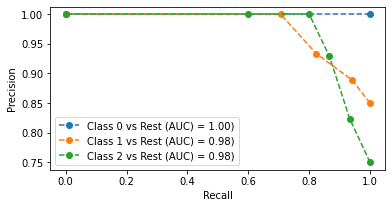

In [128]:
fig,ax = plt.subplots(figsize=(6, 3))
for cls in [0, 1, 2]:
    prc = metrics.precision_recall_curve
    precision, recall, _ = prc(im_test_tgt[:,cls],
                               pred_probs[:,cls])
    prc_auc = metrics.auc(recall, precision)
    label = "Class {} vs Rest (AUC) = {:.2f})".format(cls, prc_auc)
    ax.plot(recall, precision, 'o--', label=label)
ax.legend()
ax.set_xlabel('Recall')
ax.set_ylabel('Precision');

The PRC for class 0, *setosa*, versus the rest is perfect.

# 6.6 Cumulative REsponse and Lift Curves

So far, we examined performance metrics in a fairly isolated setting.  What happens when the real world encroaches on the ivory tower.  One of the biggest real-world factors is *limited resources*, particularly of the noncomputational variety.  Wehn deploying a system into the real world, we often can't do *everything* the system might recommend to us.  For example, if we decide to treat all folks predicted to be sick with a probability greater than 20%, we might overwhelm certain health care facilities.  There might be too many patients to treat or too many opportunities to pursue.  

How can we choose? Cumulative response and lift curves give us a nice visual way to make the decisions.  The code that we will see gives us a precise, compact definition of these.

The code to make these graphs is short.  We basically compute our classificaiton scores and order our predictions by those scores.  We want the most likely cat to be the first thing we call a cat.  To make this work we must do the following:

1. Find our preferred order of the test examples, starting from the one with the highest `proba` and moving down the line,
2. Use that order to rank our known, real outcomes
3. Keep a running total of how well we are doing with respect to those real values.

We are comparing a running total of our predictions, ordered by score, against the real world.  We graph our running percent of success against the total amount of data we used up to that point.  One other trick is that we treat the known targets as zero-one values and add them up.  That gets us a running *count* as we incorporate more and more examples.  We convert the count to a percent by dividing by the final, total sum.

In [129]:
# negate b/c we want big values first
myorder = np.argsort(-prob_true)

# cumulative sum then to percent (last value is total)
realpct_myorder = iris_1c_test_tgt[myorder].cumsum()
realpct_myorder = realpct_myorder / realpct_myorder[-1]

# convert counts of data into percents
N = iris_1c_test_tgt.size
xs = np.linspace(1/N, 1, N)

print(myorder[:3])

[ 0 28 43]


This says that the first three examples I would pick to classify as hits are 0, 28, and 43

In [130]:
print(myorder)

[ 0 28 43 23 17 11 48  4 35  5 21 10 22 36 25 34 20 15 16 40 32 19 39 42
  7 29 44 37 12 41 14 31  8  1 13  3 27 30  6 49 26  9  2 38 33 45 24 46
 47 18]


In [131]:
print(realpct_myorder[:3])

[0.0588 0.1176 0.1765]


In [132]:
iris_1c_test_tgt[myorder]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [133]:
iris_1c_test_tgt[myorder].cumsum()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 15, 15,
       16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17],
      dtype=int32)

In [134]:
N

50

In [135]:
xs

array([0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22,
       0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44,
       0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66,
       0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88,
       0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ])

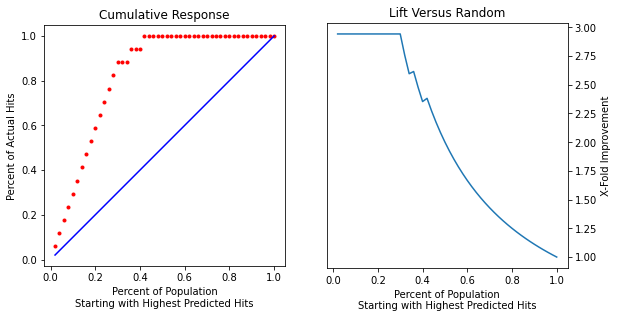

In [136]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.tight_layout()

# cumulative response
ax1.plot(xs, realpct_myorder, 'r.')
ax1.plot(xs, xs, 'b-')
ax1.axes.set_aspect('equal')

ax1.set_title('Cumulative Response')
ax1.set_ylabel('Percent of Actual Hits')
ax1.set_xlabel('Percent of Population\n' +
               'Starting with Highest Predicted Hits')

# lift
# replace divide by zero with 1.0
ax2.plot(xs, realpct_myorder / np.where(xs > 0, xs, 1))
ax2.set_title('Lift Versus Random')
ax2.set_ylabel('X-Fold Improvement') # not cross-fold!
ax2.set_xlabel('Percent of Population\n' +
               'Starting with Highest Predicted Hits')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right');

First, let's discuss the cumulative response curve.  The *y*-axis is our true positive rate: how well we do with respect to reality.  The *x*-axis is a bit more complicated to read.  At a given point on the *x* axis, we are targeting the "predicted best" *x*% of the pop7ulation and asking how well we did.  For example, we can see that when we are allowed to use the first 40% of the population (our top 40% predictions), we get 100% of the hits. That can represent a tremendous real-world savings.

Imagine we are running a fundraising campaign and sending letters to potential donors.  Some people read the letter and throw it in the trash, whereas others read it and response with a sizable and appreciated donation.  If our mailing had a predictive model as good as our model, we could save a lot on postage.  Instead of spending \\$10,000.00 on postage for everyone, we could spend \\$4,000.00 and target just the predicted-best 40% If the model is really that good, we'd still hit *all* of our target donors who would contribute.

The Lift Versus Random curve, sometimes called a lift curve or a gain curve, simply divies the performance of our smart classifier against the performance of a baseline random classifier.  You can think of it as taking a vertical slice up and down from the Cumulative Response graph, grabbing the red-dot value, and dividing it by the blue-line value.  It is reassuring to see that when we start out, we are doing far better than random.  As we bring in more of the population--we commit to spending more on postage--it gets harder to win by much over random.  After we've targetd all of the actual hits, we can only lose ground.  In reality, we should probably stop sending out more requests.

# 6.7 More Sophisticated Evaluation of Classifiers: Take Two

We've come a long way now.  Let's apply what we've learned by taking the binary *iris* problem and seeing how our current basket of classifiers performs on it with our more sophisticated evaluation techniques.  Then, we turn to a different dataset.

In [137]:
classifiers = {'base'  : baseline,
               'gnb'   : naive_bayes.GaussianNB(),
               '3-NN'  : neighbors.KNeighborsClassifier(n_neighbors=3),
               '10-NN' : neighbors.KNeighborsClassifier(n_neighbors=10) }

# define the one_class iris problem so we don't ahve random == 1 around
iris_onec_ftrs = iris.data
iris_onec_tgt = iris.target==1

In [138]:
print(iris.target.shape)
print(iris_onec_tgt)
print(iris_onec_ftrs.shape)

(150,)
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]
(150, 4)


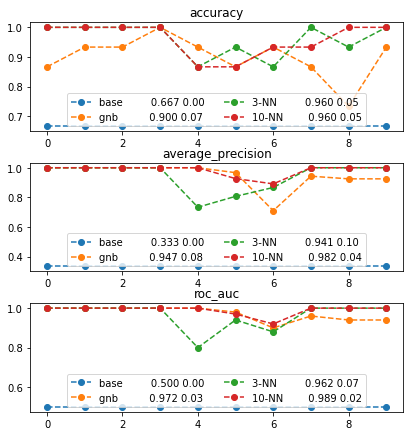

In [139]:
msrs = ['accuracy', 'average_precision', 'roc_auc']

fig, axes = plt.subplots(len(msrs), 1, figsize=(6, 2*len(msrs)))
fig.tight_layout()

for mod_name, model in classifiers.items():
    # abbreviate
    cvs = skms.cross_val_score
    cv_results = {msr:cvs(model, iris_onec_ftrs, iris_onec_tgt,
                          scoring=msr, cv=10) for msr in msrs}
    
    for ax, msr in zip(axes, msrs):
        msr_results = cv_results[msr]
        my_lbl = '{:12s} {:.3f} {:.2f}'.format(mod_name,
                                               msr_results.mean(),
                                               msr_results.std())
        
        ax.plot(msr_results, 'o--', label=my_lbl)
        ax.set_title(msr)
        ax.legend(loc='lower center', ncol=2)

Here, we jumped right to summaries.  It's heartening that our coin-flipping baseline method gets 50% on the AUC measure.  Not much else is super interesting here, but we do see that there's one CV-fold where Naive Bayes does really poorly.

To see more details on where the precision comes from or what the ROC curves look like, we need to peel back a few layers.

Text(19.050000000000004, 0.5, 'Actual')

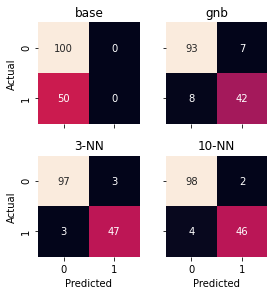

In [140]:
fig, axes = plt.subplots(2, 2, figsize=(4, 4), sharex=True, sharey=True)
fig.tight_layout()
for ax, (mod_name, model) in zip(axes.flat, classifiers.items()):
    preds = skms.cross_val_predict(model,
                                   iris_onec_ftrs, iris_onec_tgt,
                                   cv=10)
    cm = metrics.confusion_matrix(iris.target==1, preds)
    sns.heatmap(cm, annot=True, ax=ax,
                cbar=False, square=True, fmt='d')
    
    ax.set_title(mod_name)
    
axes[1, 0].set_xlabel('Predicted')
axes[1, 1].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')
axes[1, 0].set_ylabel('Actual')

To dive into the ROC curves, we can make use of an argument to `cross_val_predict` that lets us extract the classification scores directly from the aggregate cross-validation classifiers. We do taht with `method='predict_proba'` below.  Instead of returning a single class, we get back the class scores.

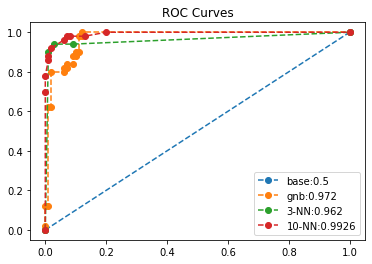

In [141]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

cv_prob_true = {}
for mod_name, model in classifiers.items():
    cv_probs = skms.cross_val_predict(model,
                                      iris_onec_ftrs, iris_onec_tgt,
                                      cv=10, method='predict_proba')
    cv_prob_true[mod_name] = cv_probs[:, 1]
    
    fpr, tpr, thresh = metrics.roc_curve(iris_onec_tgt,
                                         cv_prob_true[mod_name])
    
    auc = metrics.auc(fpr, tpr)
    ax.plot(fpr, tpr, 'o--', label="{}:{}".format(mod_name, auc))
    
ax.set_title('ROC Curves')
ax.legend();

Based on the ROC graph,we are probably most interested in our 10-NN model right now because of its slightly better AUC.  We'll make use of the `cv_prob_true`s from last example to create our lift curve:  

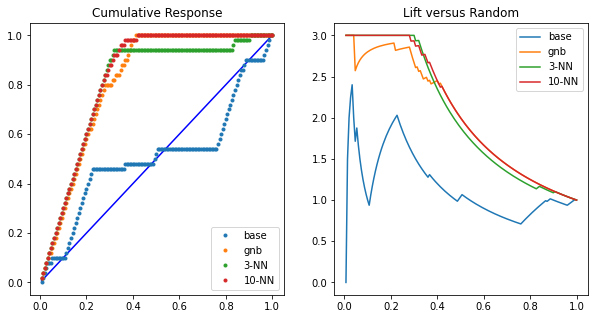

In [142]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 5))

N = len(iris_onec_tgt)
xs = np.linspace(1/N, 1, N)

ax1.plot(xs, xs, 'b-')

for mod_name in classifiers:
    # negate so big values come first
    myorder = np.argsort(-cv_prob_true[mod_name])
    
    # cumulative sum then to percent (last value is total)
    realpct_myorder = iris_onec_tgt[myorder].cumsum()
    realpct_myorder = realpct_myorder / realpct_myorder[-1]
    
    ax1.plot(xs, realpct_myorder, '.', label=mod_name)
    
    ax2.plot(xs,
             realpct_myorder / np.where(xs > 0, xs, 1),
             label=mod_name)
    
ax1.legend()
ax2.legend()

ax1.set_title('Cumulative Response')
ax2.set_title('Lift versus Random');

Here, we see gains similar to what we saw in the earlier lift chart.  AFter targeting about 40% of the population, we can probably stop trying to find more *veritosa*.  We have some different leaders at different times; GNBfalls off and then surpasses 3-NN. GNB and 10-NN both peak out when targeting 40% of the population.  3-NN seems to hit a lull and doesn't hit 100% success (*y*-axis) success until a near-100% targeting rate on the *x* axis.

### 6.7.2 A Novel Multiclass Problem

Now, we turn our attention to a new problem and deal with the issues with multiclass problems.  Our dataset was gathered by Cortez and Silva and I downloaded it from the UCI data repository here: https://archive.ics.uci.edu/ml/machine-learning-databases/00320/

The data measures the student achievement in two secondary education subjects: math and language.  The two subjects are described in different CSV files; we are only going to look at the math data.  The data attributes include student grades, demographic, social and school-related features collected by using school reports and questionnaires.  For our example here, I preprocessed the data to (1) remove non-numerical features and (2) produce a discrete target class for classification.  The code to reproduce my preprocessing is shown at the end of the chapter.

In [143]:

student_url = ('https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip')

def grab_student_numeric_discrete():
    # download zip file and unzip
    # unzipping unknown files can be a security hazard
    import urllib.request, zipfile
    urllib.request.urlretrieve(student_url,
                               'port_student.zip')
    zipfile.ZipFile('port_student.zip').extract('student-mat.csv')
    
    #preprocessing
    df = pd.read_csv('student-mat.csv', sep=';')
    
    # g1 & g2 are highly correlated with g3;
    # dropping them makes the problem significantly harder
    # we also remove all non-numeric columns
    # and discretize the final grade by 0-50-75-100 percentile
    # which were determined by hand
    df = df.drop(columns=['G1', 'G2']).select_dtypes(include=['number'])
    df['grade'] = pd.cut(df['G3'], [0, 11, 14, 20],
                         labels=['low', 'mid', 'high'],
                         include_lowest=True)
    df.drop(columns=['G3'], inplace=True)
    
    # save as
    df.to_csv('portugese_student_numeric_discrete.csv', index=False)

In [144]:
grab_student_numeric_discrete()

In [145]:
student_df = pd.read_csv('portugese_student_numeric_discrete.csv')
student_df['grade'] = pd.Categorical(student_df['grade'],
                                     categories=['low', 'mid', 'high'],
                                     ordered=True)

In [146]:
student_ftrs = student_df[student_df.columns[:-1]]
# pd.series.cat.codes
# returns Series of codes as well as the index.
student_tgt = student_df['grade'].cat.codes

We start off gently with a simple 3-NN classifier evaluated with accuracy.  We've discussed its limitations, but it is still a simple method and metric to get us started.  If the target classes aren't too unbalanced, we might be OK with accuracy.



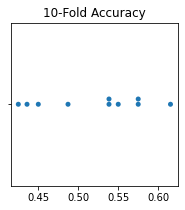

In [147]:
fig,ax = plt.subplots(1, 1, figsize=(3, 3))
model = neighbors.KNeighborsClassifier(3)
cv_auc = skms.cross_val_score(model,
                              student_ftrs, student_tgt,
                              scoring='accuracy', cv=10)
ax = sns.swarmplot(cv_auc, orient='v')
ax.set_title('10-Fold Accuracy');

Now, if we want to move on to precision, we have to go beyond the simple `scoring='average_precision'` argument to `cross_val_score` interface that `sklearn` provides.  The average is really an average for a *binary* classification problem.  If we have multiple target classes, we need to specify *how* we want to average the results.  We discussed *macro* and *micro* strategies earlier in the chapter.   We'll use *macro* here and pass it as an argument to a `make_scorer` call.

Text(0.5, 1.0, '10-Fold Macro Precision')

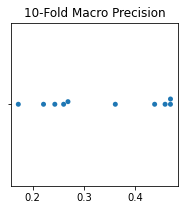

In [148]:
model = neighbors.KNeighborsClassifier(3)
my_scorer = metrics.make_scorer(metrics.precision_score,
                                average='macro')
cv_auc = skms.cross_val_score(model,
                              student_ftrs, student_tgt,
                              scoring=my_scorer, cv=10)
fig,ax = plt.subplots(1, 1, figsize=(3, 3))
sns.swarmplot(cv_auc, orient='v')
ax.set_title('10-Fold Macro Precision')

Following a very similar strategy, we can use our Hand and Till *M* evaluator.

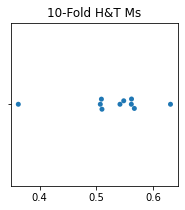

In [151]:
htm_scorer = metrics.make_scorer(hand_and_till_M_statistic,
                                 needs_proba=True)
cv_auc = skms.cross_val_score(model,
                              student_ftrs, student_tgt,
                              scoring=htm_scorer, cv=10)
fig,ax = plt.subplots(1, 1, figsize=(3, 3))
sns.swarmplot(cv_auc, orient='v')
ax.set_title('10-Fold H&T Ms');

Now we can compare a few different classifiers with a few different metrics.

In [162]:
classifiers = {'base' : dummy.DummyClassifier(strategy='most_frequent'),
               'gnb'  : naive_bayes.GaussianNB(),
               '3-NN' : neighbors.KNeighborsClassifier(n_neighbors=3),
               '10-NN': neighbors.KNeighborsClassifier(n_neighbors=10)}
classifiers.items()

dict_items([('base', DummyClassifier(strategy='most_frequent')), ('gnb', GaussianNB()), ('3-NN', KNeighborsClassifier(n_neighbors=3)), ('10-NN', KNeighborsClassifier(n_neighbors=10))])

base
gnb
3-NN
10-NN


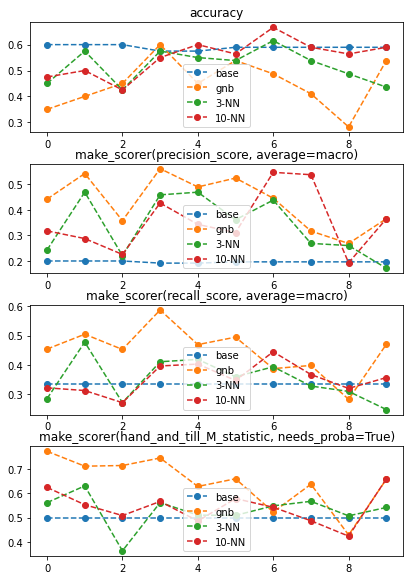

In [181]:
macro_precision = metrics.make_scorer(metrics.precision_score,
                                      average='macro')
macro_recall    = metrics.make_scorer(metrics.recall_score,
                                      average='macro')
htm_scorer = metrics.make_scorer(hand_and_till_M_statistic,
                                 needs_proba=True)

msrs = ['accuracy', macro_precision,
        macro_recall, htm_scorer]

fig, axes = plt.subplots(len(msrs), 1, figsize=(6, 2*len(msrs)))
fig.tight_layout()

for mod_name, model in classifiers.items():
    # abbreviate
    cvs = skms.cross_val_score
    cv_results = {msr:cvs(model, student_ftrs, student_tgt,
                          scoring=msr, cv=10) for msr in msrs}
    print(mod_name)
    for ax, msr in zip(axes, msrs):
        msr_results = cv_results[msr]
        my_lbl = "{:12s} {:.3f} {:.2f}".format(mod_name,
                                               msr_results.mean(),
                                               msr_results.std())
        
        ax.plot(msr_results, 'o--')
        ax.set_title(msr)
    
        # uncomment to see summary stats (clutters plots)
        ax.legend(classifiers.keys(), loc='lower center')

It appears we made a pretty hard problem for ourselves.  Accuracy, precision, and recall all seem to be pretty downright awful.  That cautions us in our interpretation of the Hand and Till *M* values.  A few folds of GNB have some values that aren't awful, but half of the fold values for GNB end up near 0.6.  Remember the preprocessing we did? By throwing out features and discretizing, we've turned this into a very hard problem.
We know things aren't good, but there is a glimmer of hope--maybe we do well on some classes, but just poorly overall?


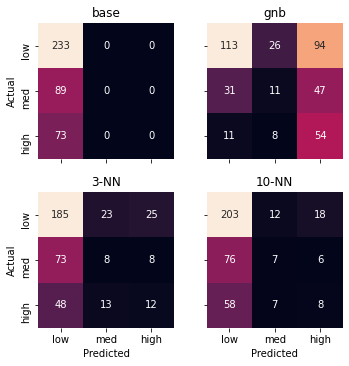

In [182]:
fig, axes = plt.subplots(2, 2, figsize=(5, 5), sharex=True, sharey=True)
fig.tight_layout()

for ax, (mod_name, model) in zip(axes.flat,
                                 classifiers.items()):
    preds = skms.cross_val_predict(model,
                                   student_ftrs, student_tgt,
                                   cv=10)
    cm = metrics.confusion_matrix(student_tgt, preds)
    sns.heatmap(cm, annot=True, ax=ax,
                cbar=False, square=True, fmt='d',
               xticklabels=['low', 'med', 'high'],
               yticklabels=['low', 'med', 'high'])
    ax.set_title(mod_name)
    
axes[1, 0].set_xlabel('Predicted')
axes[1, 1].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')
axes[1, 0].set_ylabel('Actual');
    
    

Not so much.  A large part of our problem is that we're simply predicting the low class (even with our nonbaseline methods) an awful lot of the time.  We need more information to tease apart the distinguishing characteristics of the target classes.

# 6.8 EOC

## 6.8.1

We added *many* techniques to our quicker of classification evaluation tools  We can now account for unbalanced numbers of target classes, asses our learners with respect to reality and predictions (separately and jointly), and we can dive into specific class-by-class failures.  We can also determine the overall benefit that a classification system gets us over guessing a random target.